In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
# Let us read the data and take a look at first few rows.

df_store = pd.read_csv("SampleSuperstore.csv")
df_store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
#column names of table

df_store.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [4]:
#row,column count of data

df_store.shape

(9994, 13)

In [5]:
#check data type of columns/attributes

df_store.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
# checking the information of the above data

df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
df_store.isnull().sum()

# There are no missing values. Hence we can go exploratory analysis part directly.

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
# Check for unnecessary columns and drop them if not required

df_store['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [9]:
# Clearly the data is for US country only, so we can drop the 'Country' column as we dont 
# need any analysis to be done based on it. Also we can drop postal code as well.

#dropping Country column
df=df_store.drop(columns = ['Country','Postal Code'],axis=1)
df.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
# Showing the five number summary using describe function

df.describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [13]:
ds = df.select_dtypes(include=[np.number])
ds

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


In [14]:
# checking the outliers

cols = ds.columns.to_list()
cols

['Sales', 'Quantity', 'Discount', 'Profit']

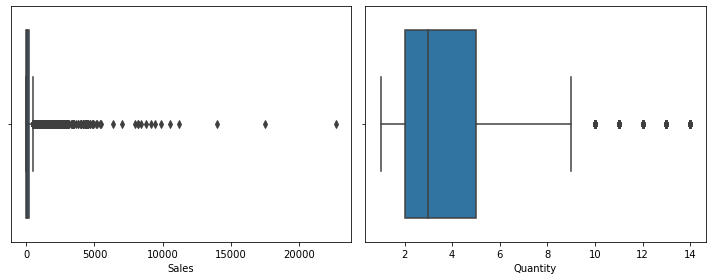

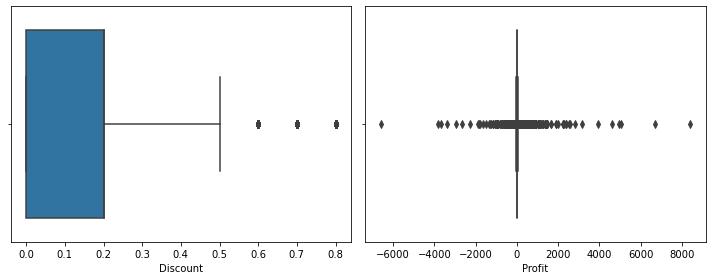

In [15]:
for i in range(0, len(cols), 2):
    if len(cols)>i + 1:
        plt.figure(figsize = (10,4))
        plt.subplot(121)
        sns.boxplot(ds[cols[i]])
        plt.subplot(122)
        sns.boxplot(ds[cols[i + 1]])
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(ds[cols[i]])

In [16]:
# Treating outliers

from scipy.stats.mstats import winsorize  # importing the inbuild winsorize model from scipy library
# Treating outliers
for i in cols:
    if i in ds.select_dtypes(include = np.number).columns:
        ds[i] = winsorize(ds[i],limits = [0.05,0.1],inclusive = (True,True))
        
ds.shape

(9994, 4)

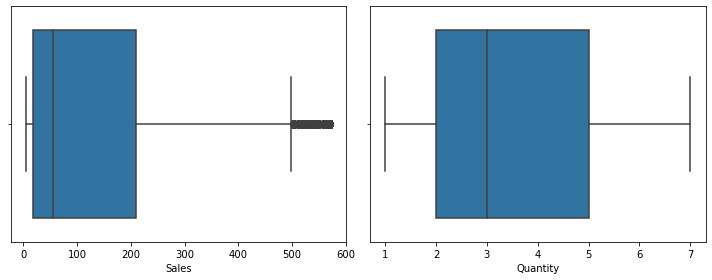

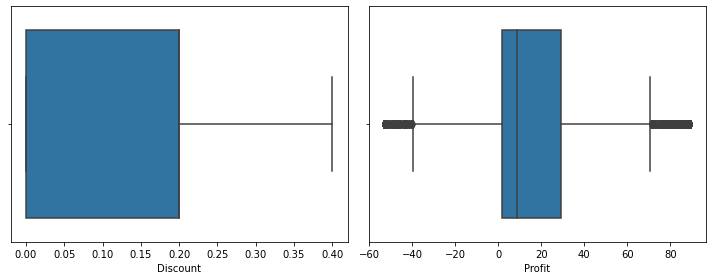

In [17]:
# taking a list of all the features/columns
# Boxplot of all features to identify the outliers

for i in range(0, len(cols), 2):
    if len(cols)>i + 1:
        plt.figure(figsize = (10,4))
        plt.subplot(121)
        sns.boxplot(ds[cols[i]])
        plt.subplot(122)
        sns.boxplot(ds[cols[i + 1]])
        plt.tight_layout()
        plt.show()
    else:
        sns.boxplot(ds[cols[i]])

In [18]:
# The Winsorize model treats all the outliers with 100% accuracy. Now our data is ready for Exploratory Data Analysis.

In [19]:
# Let's check correlation between different columns

df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


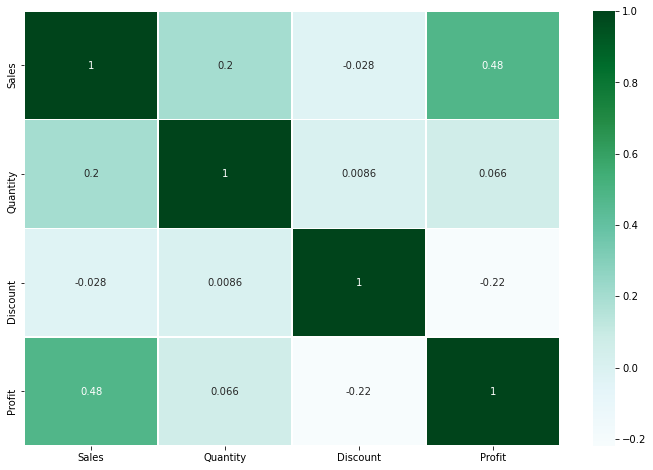

In [20]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,cmap="BuGn")

In [21]:
# Classes of Columns

print("Shipping mode types: ",df['Ship Mode'].unique())
print()
print("Segment types: ",df['Segment'].unique())
print()
print("Category of Products: ",df['Category'].unique())
print()
print("Sub Categories: ",df['Sub-Category'].unique())

Shipping mode types:  ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Segment types:  ['Consumer' 'Corporate' 'Home Office']

Category of Products:  ['Furniture' 'Office Supplies' 'Technology']

Sub Categories:  ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


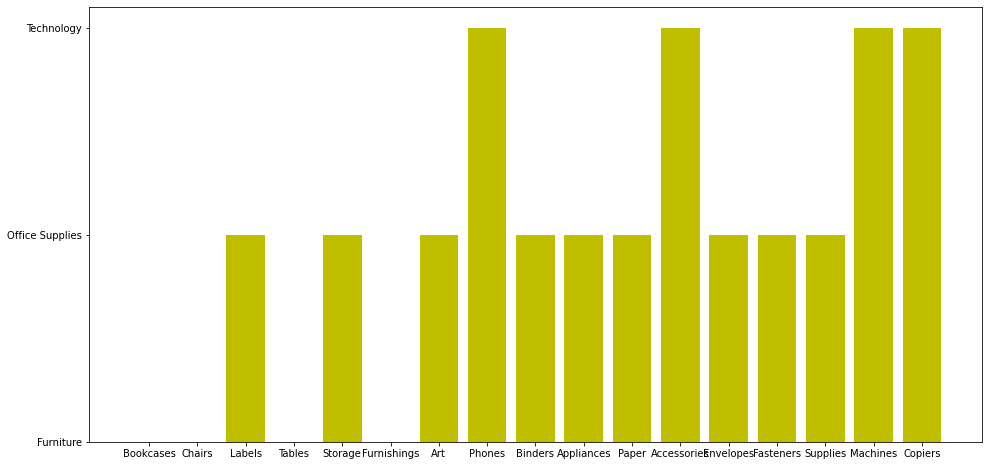

In [22]:
#Lets see how sub-categories are distributed wrt to category

plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category',data=df,color='y')
plt.show()

# From this graph, one can easily makeout which Category & Sub-Category to choose when they are looking to purchase a product

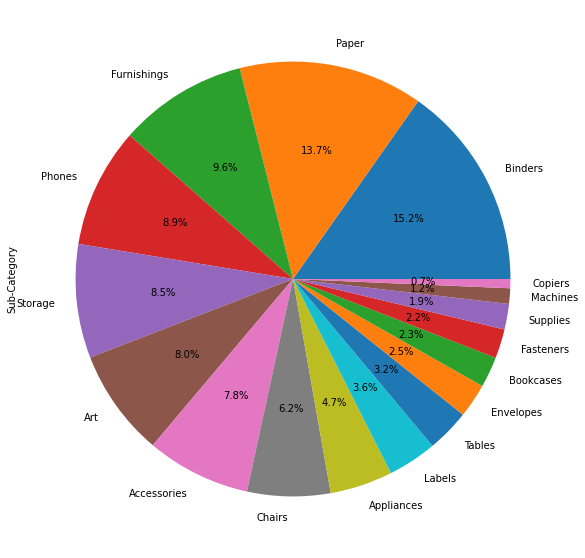

In [23]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

# The store has wide variety of Office Supplies especially in Binders and Paper department.

# Data Visualization according to Sales and Profit

In [25]:
explore_cols = ['Ship Mode', 'Segment', 'Region', 'Category']  # object type features which we are going to explore

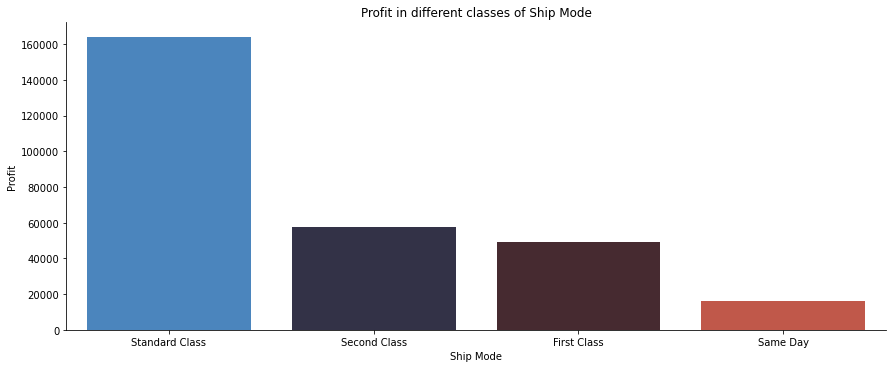

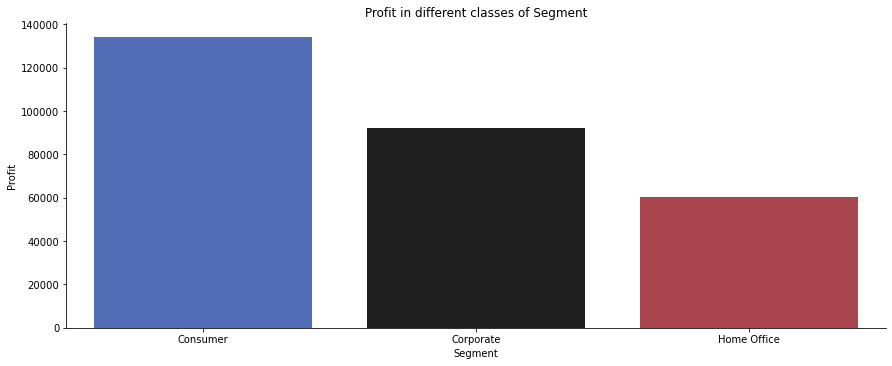

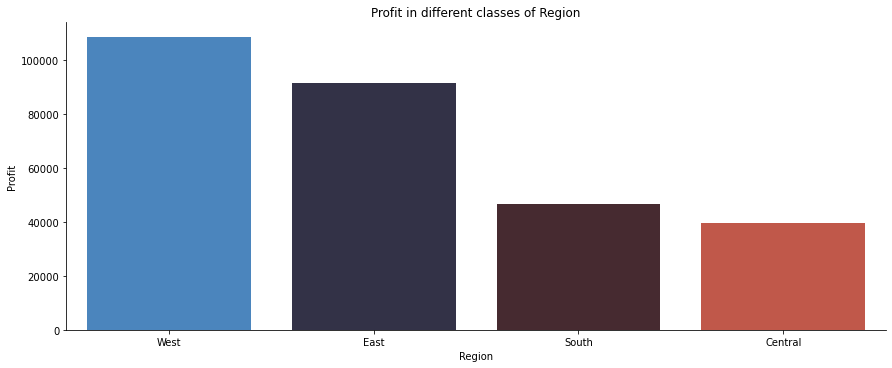

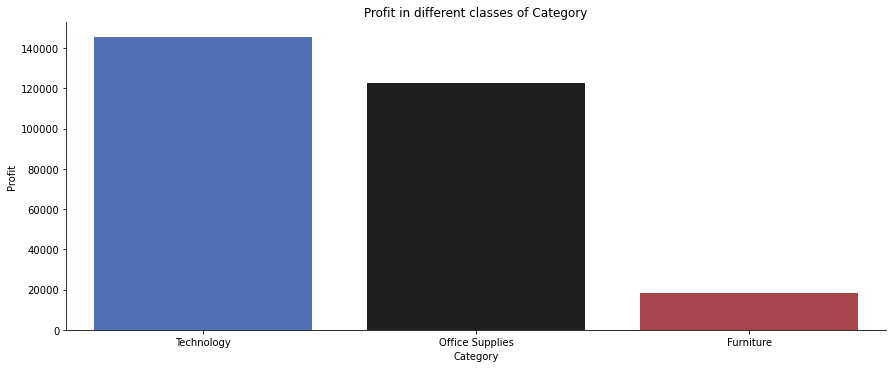

In [26]:
for i in explore_cols:
    un_sor = df.groupby(i)['Profit'].sum().to_frame().reset_index().sort_values(by='Profit',ascending=False)
    sns.catplot(x = i,y = 'Profit',data = un_sor,kind = 'bar',aspect = 2.5,palette = 'icefire')
    plt.ylabel('Profit')
    plt.xlabel(i)
    plt.title("Profit in different classes of {}".format(i))
    plt.show()
    print('\n')

In [27]:
# Sales of different classes of object type features of dataset

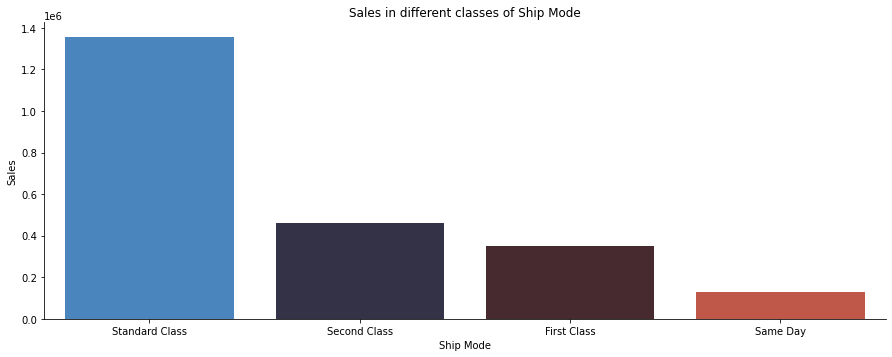

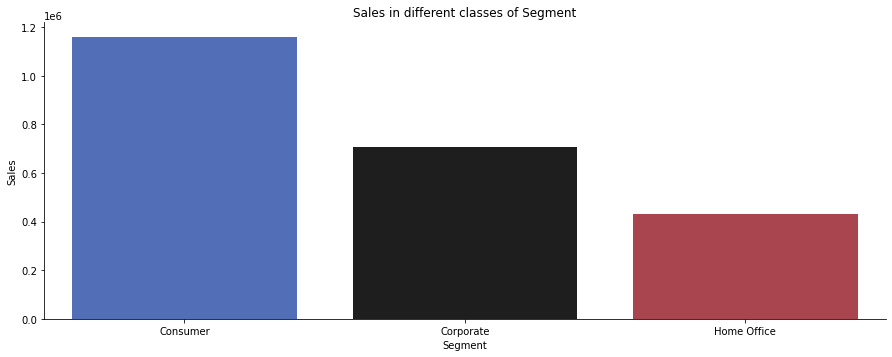

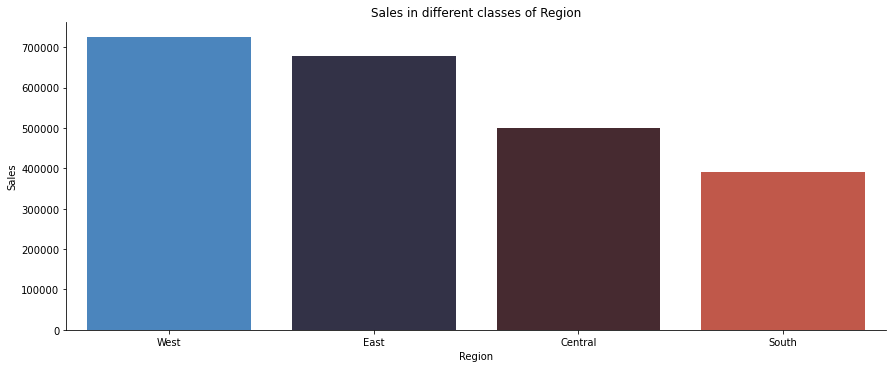

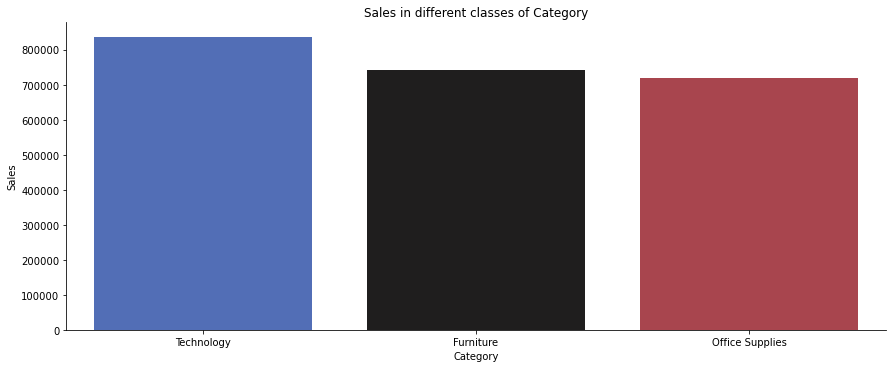

In [28]:
for i in explore_cols:
    un_sor = df.groupby(i)['Sales'].sum().to_frame().reset_index().sort_values(by='Sales',ascending=False)
    sns.catplot(x = i,y = 'Sales',data = un_sor,kind = 'bar',aspect = 2.5,palette = 'icefire')
    plt.ylabel('Sales')
    plt.xlabel(i)
    plt.title("Sales in different classes of {}".format(i))
    plt.show()
    print('\n')

In [29]:
# Counter plot of different features in object type columns of dataset

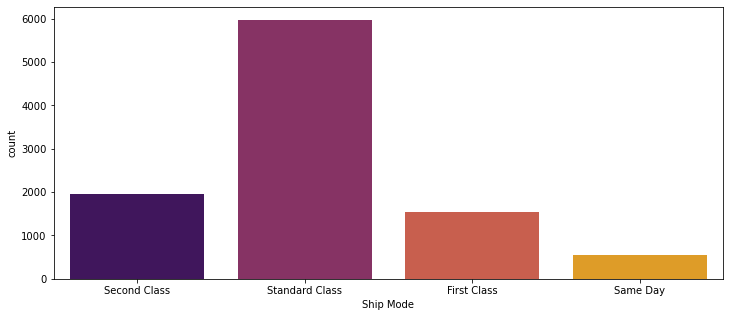

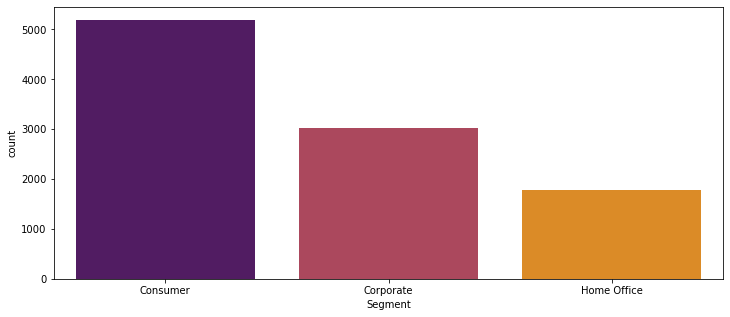

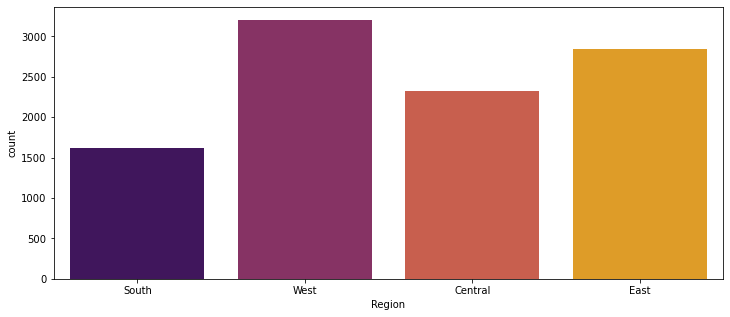

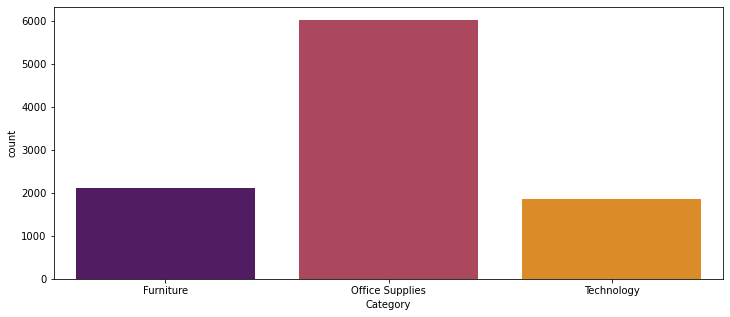

In [30]:
for i in explore_cols:
    plt.figure(figsize = (12,5))
    sns.countplot(df[i],palette = 'inferno')
    plt.show()

In [31]:
# Observations:

# In the Ship Mode, the standard class has the highest count which means the customers gives high priority to this type of 
# shipping mode.

#In the Segment,the consumers have the highest count which means that the consumers do the highest number of shipping.

# In the Region,the West region has the highest number of customer counts.

# In the item category,the office supplies category has the highest sales count.

#Sub Category Wise Data Visualization

Text(0, 0.5, 'Frequency')

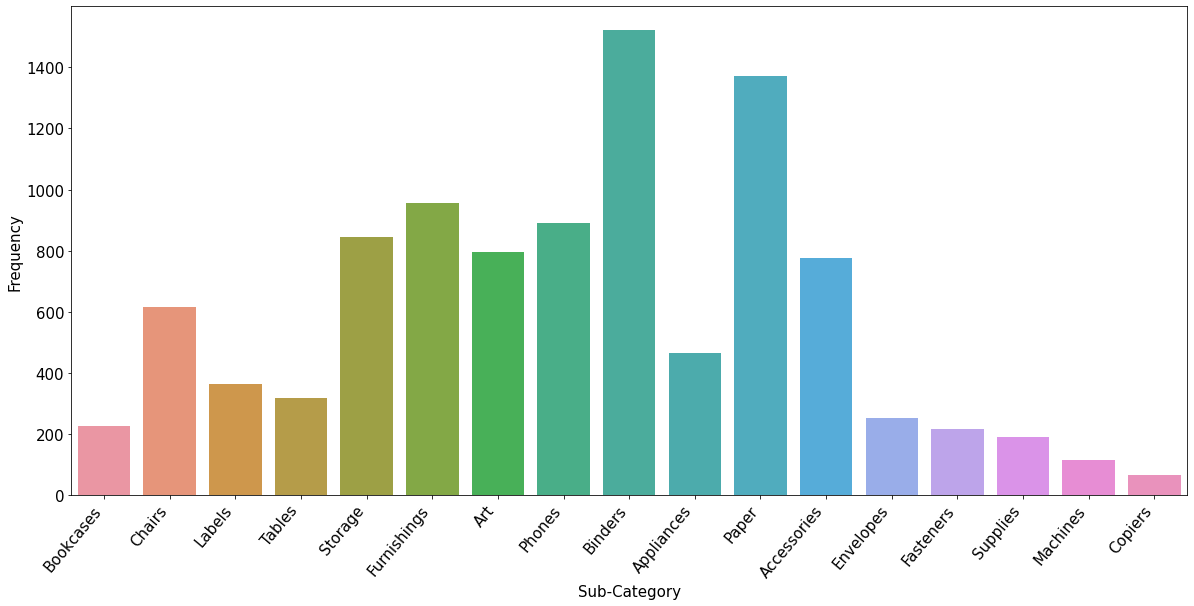

In [32]:
plt.figure(figsize = (20,9))
sns.countplot(df['Sub-Category'])
plt.xticks(rotation = 50,ha = 'right',fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)

In [33]:
sub = df.groupby('Sub-Category')['Profit'].sum().to_frame().reset_index()
sub = sub.sort_values(by = 'Profit',ascending = False)

Text(0, 0.5, 'Profit')

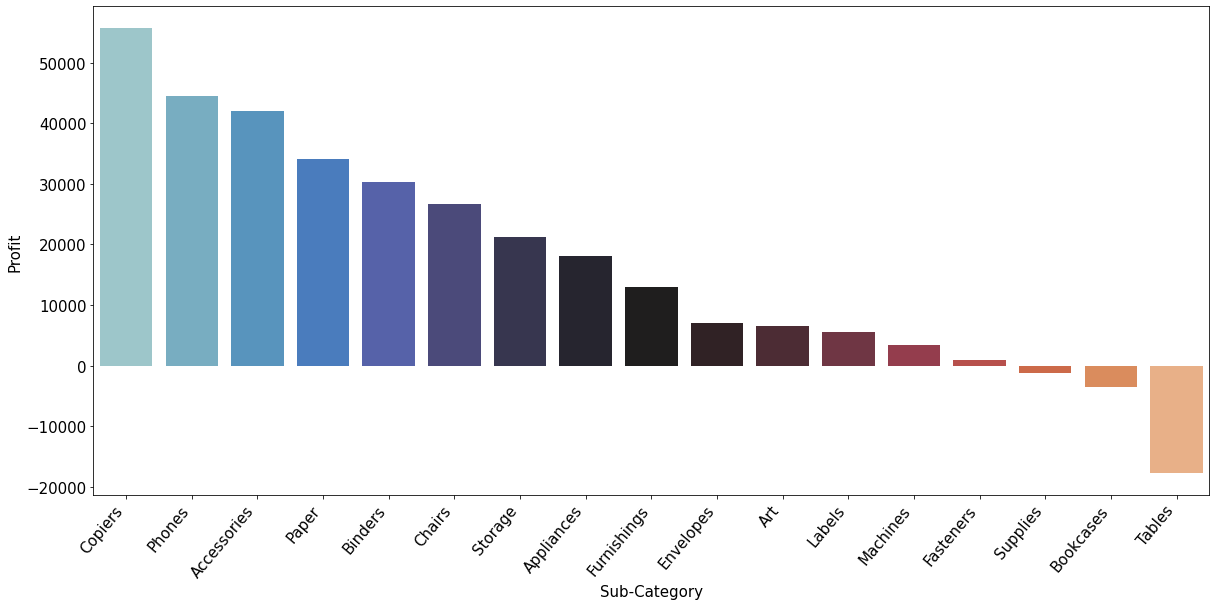

In [34]:
plt.figure(figsize = (20,9))
sns.barplot(x = 'Sub-Category',y = 'Profit',data = sub,palette = 'icefire')
plt.xticks(rotation = 50,ha = 'right',fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Sub-Category',fontsize = 15)
plt.ylabel('Profit',fontsize = 15)

In [35]:
# Obervations from the above graph:

# From the above graph, we can clearly see that the Top most Profitable selling products are Copiers, Phones and Accessories.
# Also we can see that machines have the lowest count as well as Profit.
# Phones are having the highest profit despite of having the lowest count.
# Also, we can observe that Supplies, Bookcases and Tables are in loss.

# State wise data visualization

In [36]:
top_sales_state = df.groupby('State')['Sales'].sum().to_frame().reset_index().nlargest(10,'Sales')
print('Top ten States with highest Sales: ')
print(top_sales_state)
print('\n')
top_sale_stat = df.groupby('State')['Profit'].sum().to_frame().reset_index().nlargest(10,'Profit')
print('Top ten States with highest Profit: ')
print(top_sale_stat)

Top ten States with highest Sales: 
           State        Sales
3     California  457687.6315
30      New York  310876.2710
41         Texas  170188.0458
45    Washington  138641.2700
36  Pennsylvania  116511.9140
8        Florida   89473.7080
11      Illinois   80166.1010
33          Ohio   78258.1360
20      Michigan   76269.6140
44      Virginia   70636.7200


Top ten States with highest Profit: 
         State      Profit
3   California  76381.3871
30    New York  74038.5486
45  Washington  33402.6517
20    Michigan  24463.1876
44    Virginia  18597.9504
12     Indiana  18382.9363
9      Georgia  16250.0433
15    Kentucky  11199.6966
21   Minnesota  10823.1874
6     Delaware   9977.3748


Text(0, 0.5, 'Sales')

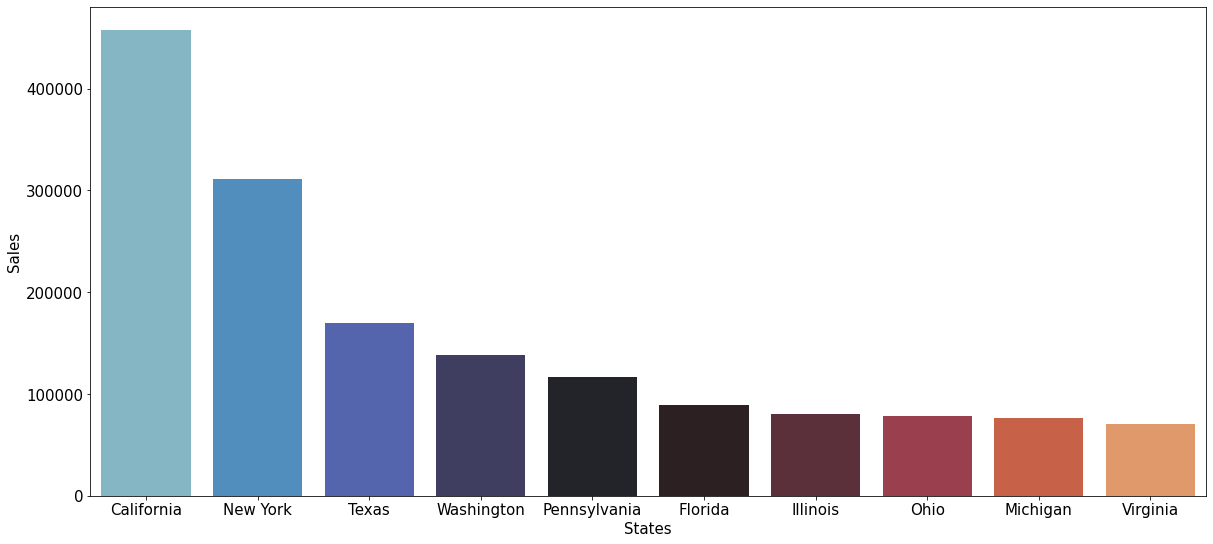

In [37]:
plt.figure(figsize = (20,9))
sns.barplot(x = 'State',y = 'Sales',data = top_sales_state,palette = 'icefire')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('States',fontsize = 15)
plt.ylabel('Sales',fontsize = 15)

Text(0, 0.5, 'Profit')

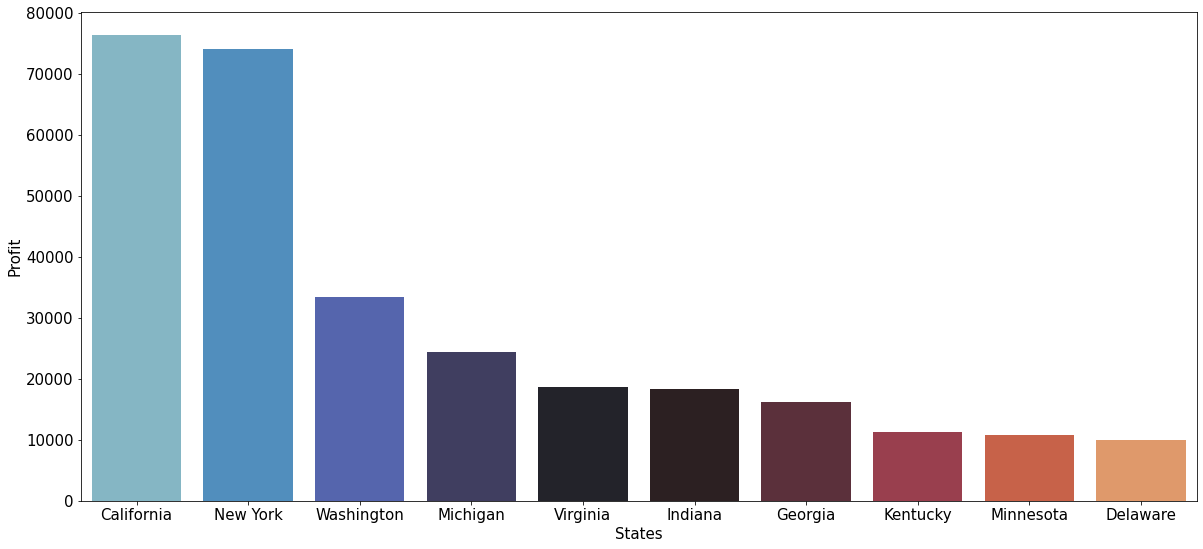

In [38]:
plt.figure(figsize = (20,9))
sns.barplot(x = 'State',y = 'Profit',data = top_sale_stat,palette = 'icefire')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('States',fontsize = 15)
plt.ylabel('Profit',fontsize = 15)

In [39]:
# Observations:

# We can see that the top selling states are Califonia, New York and Texas.
# Most Profitable selling States are California, New York and Washington.

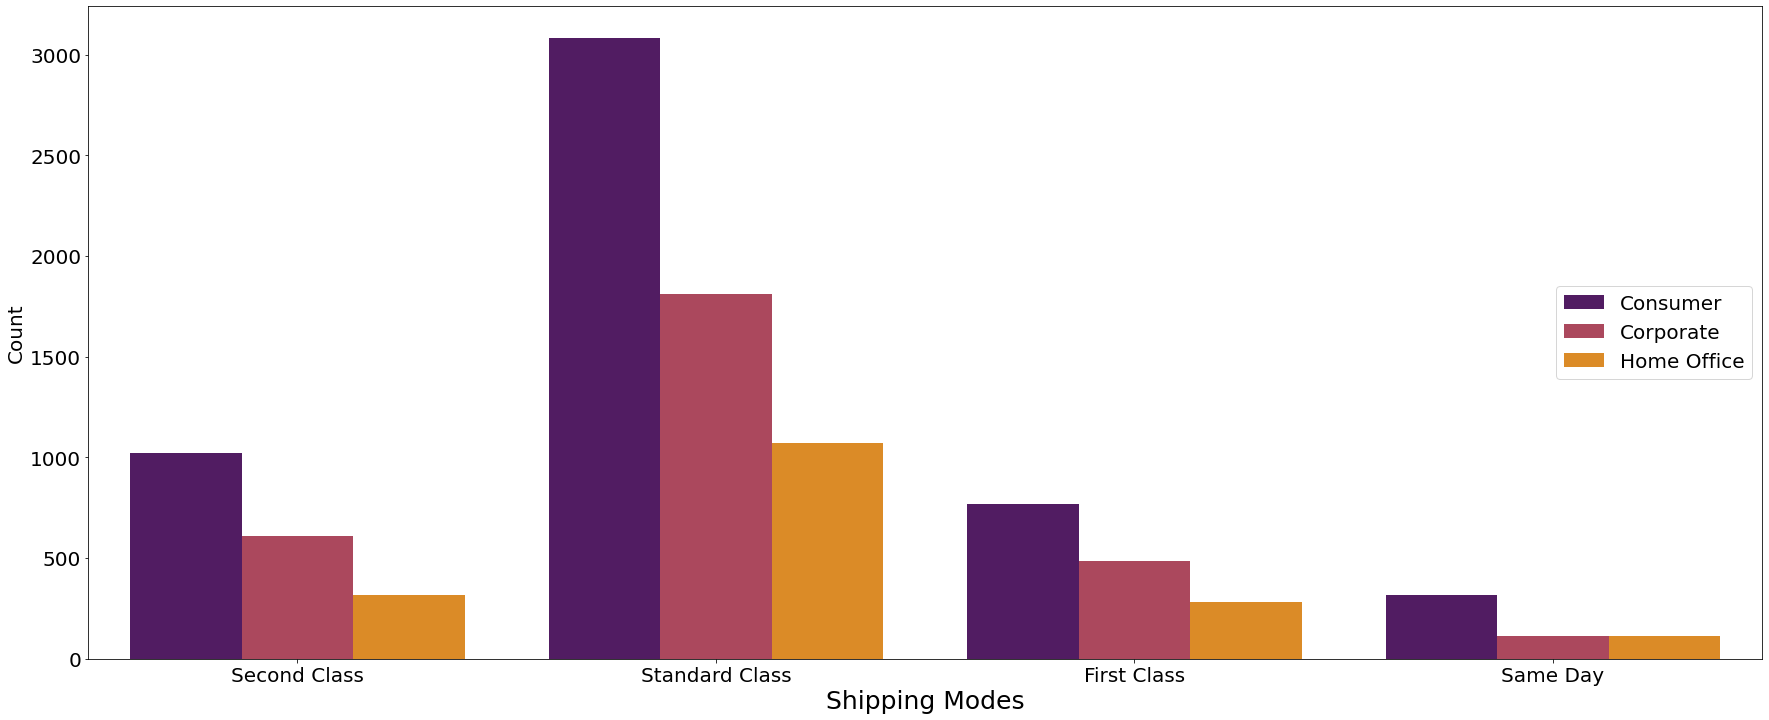

In [40]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'Ship Mode',hue = 'Segment',data = df,palette = 'inferno')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('Shipping Modes',fontsize = 25)
plt.ylabel('Count',fontsize = 20)
plt.legend(loc = 5, fontsize = 20)

In [41]:
# We can see that Standard class is the most preferable shipping mode and most of the orders are done by consumers which 
# are followed by corporate.


# Region Wise Data Visualization

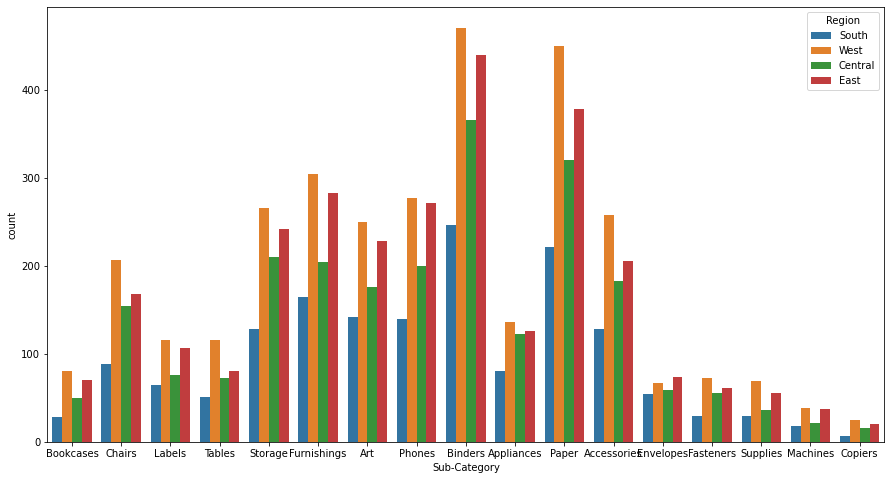

In [44]:
#Count of Sub-Category region wise

plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

In [45]:
# People residing in Western part of US tend to order more from superstore.

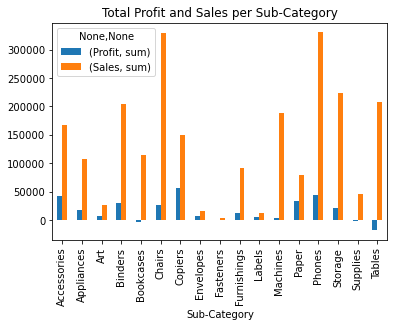

In [46]:
df.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
# plt.legend('Profit')
# plt.legend('Sales')
plt.show()

In [47]:
items = df.groupby('Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit',ascending = False)
items.head(10)

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


In [48]:
# Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.
# Another interesting fact- people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

Text(-9.075000000000003, 0.5, 'Products')

<Figure size 1440x720 with 0 Axes>

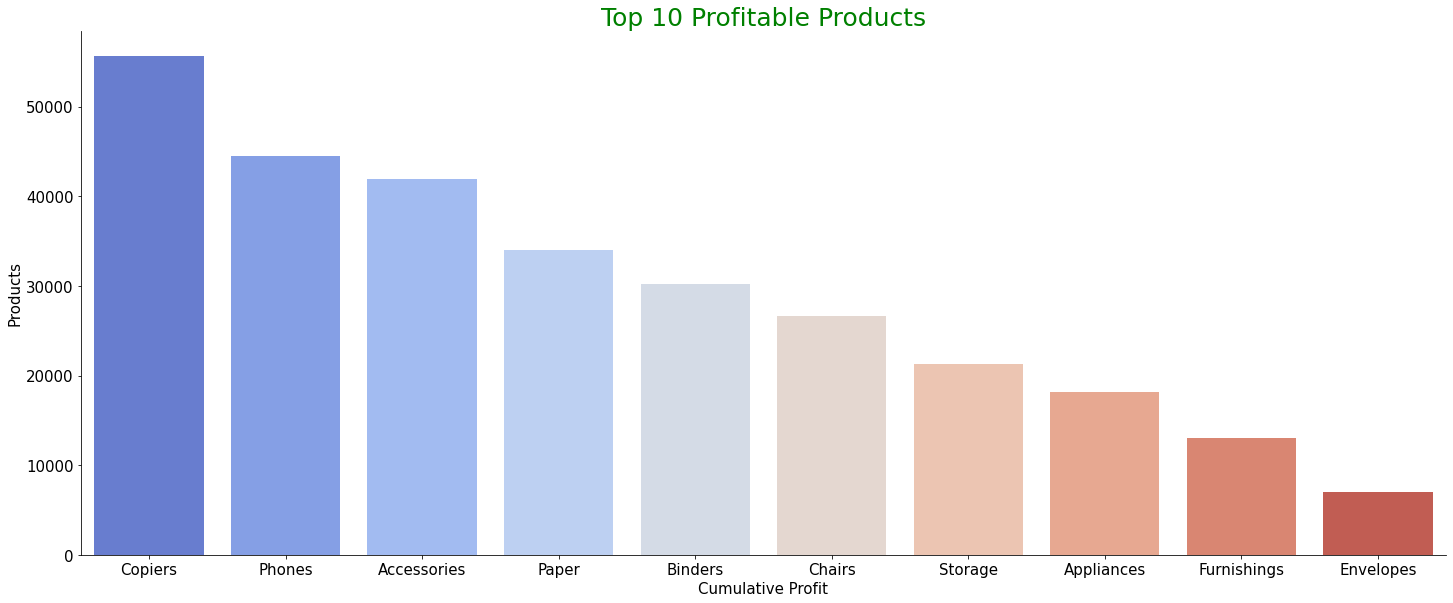

In [49]:
plt.figure(figsize = (20,10))
sns.catplot('Sub-Category','Profit',data = items.head(10),kind = 'bar',aspect = 2.5,height = 8,palette = 'coolwarm')
plt.title('Top 10 Profitable Products',size = 25,color = 'green')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel('Cumulative Profit',fontsize = 15)
plt.ylabel('Products',fontsize = 15)

In [50]:
# Copiers, Phones and Accessories are the most profitable products.

In [51]:
items = df.groupby('Sub-Category')['Profit'].sum().reset_index().nsmallest(5, 'Profit')
items

,Sub-Category,Profit
16,Tables,-17725.4811
4,Bookcases,-3472.5560
15,Supplies,-1189.0995
8,Fasteners,949.5182
11,Machines,3384.7569


In [52]:
# The least profitable sub category products are Tables,Bookcases and Supplies so the sales team should look on these products 
# moreto increase the profit.

# People residing in Western part of US tend to order more from superstore and awareness need to be created in the South region
# as the number of counts are less in south region.

# As we can see that the Same day is the least preferable shipping mode followed by First class and then second class, so 
# awareness needs to be created amongst the consumers, corporate and Home office for Same day and first class shipping mode.

# Profit needs to be increased in Furniture category. This can be done by Branding, advertisement and adding new and latest design
# furniture products.